<a href="https://colab.research.google.com/github/sneha2003er/project/blob/main/CNN_model_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive



In [ ]:
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
# Load images
train_fire_images = '/content/drive/MyDrive/data/dataset/img_data/train/fire'
train_default_images = '/content/drive/MyDrive/data/dataset/img_data/train/default'
train_smoke_images = '/content/drive/MyDrive/data/dataset/img_data/train/smoke'

test_fire_images = '/content/drive/MyDrive/data/dataset/img_data/test/fire'
test_default_images ='/content/drive/MyDrive/data/dataset/img_data/test/default'
test_smoke_images = '/content/drive/MyDrive/data/dataset/img_data/test/smoke'

In [ ]:
# load videos
train_videos = '/content/drive/MyDrive/data/dataset/video_data/test_videos'
test_videos = '/content/drive/MyDrive/data/dataset/video_data/test_videos'

## Import Libraries

In [ ]:
!pip install playsound

  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=c72d35b21abcbfa93f59bcc00e66c5d0dcce6bc290bc42eb370fa32419ede3aa
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


In [ ]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score



## Preprocess the Image Data:

In [ ]:
# Reloading the images for the CNN without flattening and normalizing
def load_images_for_cnn(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = tf.keras.preprocessing.image.load_img(os.path.join(folder, filename), target_size=(64, 64))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)




In [ ]:
# Encoding labels: fire->0, default->1, smoke->2
label_dict = {"fire": 0, "default": 1, "smoke": 2}



In [ ]:
# Load datasets
X_train_fire, y_train_fire = load_images_for_cnn(train_fire_images, label_dict["fire"])
X_train_default, y_train_default = load_images_for_cnn(train_default_images, label_dict["default"])
X_train_smoke, y_train_smoke = load_images_for_cnn(train_smoke_images, label_dict["smoke"])

X_test_fire, y_test_fire = load_images_for_cnn(test_fire_images, label_dict["fire"])
X_test_default, y_test_default = load_images_for_cnn(test_default_images, label_dict["default"])
X_test_smoke, y_test_smoke = load_images_for_cnn(test_smoke_images, label_dict["smoke"])


In [ ]:
# Concatenate datasets
X_train = np.vstack((X_train_fire, X_train_default, X_train_smoke))
y_train = np.hstack((y_train_fire, y_train_default, y_train_smoke))

X_test = np.vstack((X_test_fire, X_test_default, X_test_smoke))
y_test = np.hstack((y_test_fire, y_test_default, y_test_smoke))


In [ ]:
# Normalize data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Create the CNN Model:

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: fire, default, smoke
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

## Model Visualization:

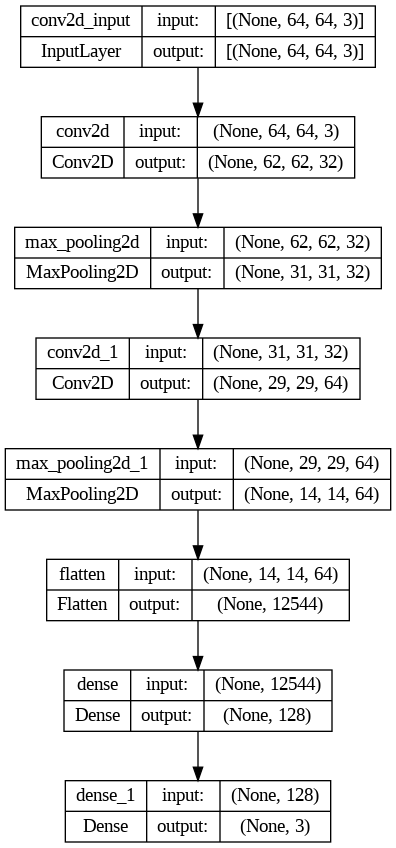

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)



##  Train the Model:

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)




Epoch 1/10
41/41 [==============================] - 9s 197ms/step - loss: 1.0175 - accuracy: 0.5019 - val_loss: 0.8703 - val_accuracy: 0.6111
Epoch 2/10
41/41 [==============================] - 6s 150ms/step - loss: 0.6165 - accuracy: 0.7582 - val_loss: 0.7629 - val_accuracy: 0.6190
Epoch 3/10
41/41 [==============================] - 8s 191ms/step - loss: 0.4772 - accuracy: 0.8200 - val_loss: 0.8648 - val_accuracy: 0.5754
Epoch 4/10
41/41 [==============================] - 6s 154ms/step - loss: 0.4348 - accuracy: 0.8322 - val_loss: 1.1428 - val_accuracy: 0.5913
Epoch 5/10
41/41 [==============================] - 8s 188ms/step - loss: 0.3437 - accuracy: 0.8719 - val_loss: 1.0280 - val_accuracy: 0.6032
Epoch 6/10
41/41 [==============================] - 6s 152ms/step - loss: 0.2705 - accuracy: 0.8993 - val_loss: 0.9984 - val_accuracy: 0.5476
Epoch 7/10
41/41 [==============================] - 8s 191ms/step - loss: 0.2324 - accuracy: 0.9199 - val_loss: 1.0281 - val_accuracy: 0.6151
Epoch 

##  Evaluate the Model on Entire Dataset:

In [ ]:
_, overall_accuracy = model.evaluate(np.vstack((X_train, X_test)), np.vstack((y_train, y_test)))
print(f"Overall Accuracy using CNN: {overall_accuracy}")

49/49 [==============================] - 3s 66ms/step - loss: 0.3673 - accuracy: 0.8791
Overall Accuracy using CNN: 0.8790786862373352


## Plot a Confusion Matrix:

49/49 [==============================] - 2s 38ms/step


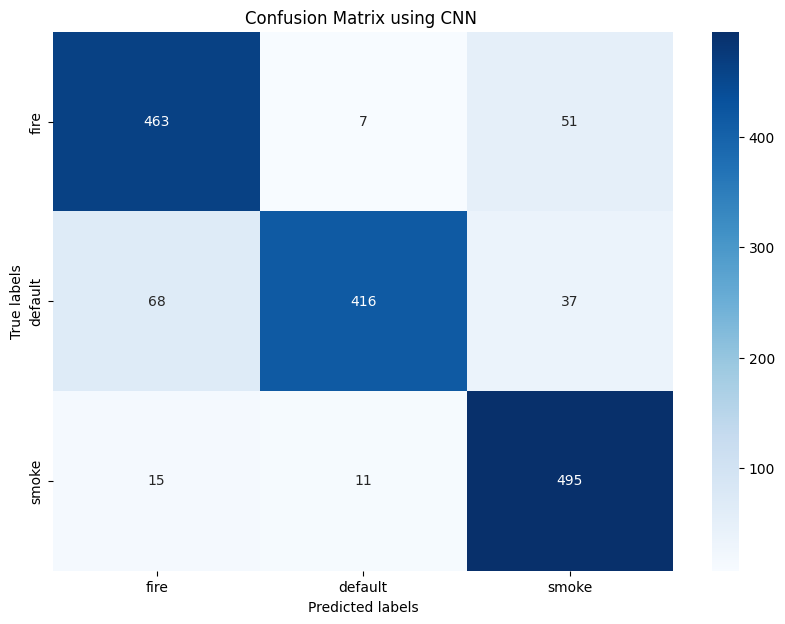

In [ ]:
# Predict
y_pred = model.predict(np.vstack((X_train, X_test)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(np.vstack((y_train, y_test)), axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["fire", "default", "smoke"],
            yticklabels=["fire", "default", "smoke"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix using CNN ')
plt.show()

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
overall_recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
overall_f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

In [ ]:
# Print the results
print("Class-wise Precision:", precision)
print("Class-wise Recall:", recall)
print("Class-wise F1 Score:", f1)

print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1 Score:", overall_f1)

Class-wise Precision: [0.84798535 0.95852535 0.8490566 ]
Class-wise Recall: [0.88867562 0.79846449 0.95009597]
Class-wise F1 Score: [0.8678538  0.87120419 0.89673913]
Overall Precision: 0.8851890991270176
Overall Recall: 0.8790786948176583
Overall F1 Score: 0.8785990382017685


In [ ]:
# Save the model in the SavedModel format
saved_model_path = '/content/drive/MyDrive/data/dataset/img_data/saved_model'
tf.saved_model.save(model, saved_model_path)

# Load the SavedModel
loaded_model = tf.saved_model.load(saved_model_path)


In [ ]:
# Define the function to make predictions on a single image
def predict_single_image(image_path):
    try:
        # Load and preprocess the input image
        img = cv2.imread(image_path)

        if img is None:
            raise ValueError(f"Error loading the image. Please check the file path: {image_path}")

        img = cv2.resize(img, (64, 64))
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)

        # Make a prediction using the loaded SavedModel
        prediction = loaded_model(tf.constant(img))
        predicted_class = np.argmax(prediction.numpy())

        # Decode the predicted class
        classes_dict = {0: 'fire', 1: 'default', 2: 'smoke'}
        predicted_label = classes_dict[predicted_class]

        return predicted_label

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return "Error"

In [ ]:
# Example usage:
base_directory = '/content/drive/MyDrive/data/dataset/img_data'

# Test with a specific image
test_image_path = os.path.join(base_directory, '/content/drive/MyDrive/data/test fire image 2.jpg')  # Replace with the actual path to your test image
print(f"Testing with image: {test_image_path}")

# Make a prediction
result = predict_single_image(test_image_path)
print(f"The input image is predicted as: {result}")


Testing with image: /content/drive/MyDrive/data/test fire image 2.jpg
The input image is predicted as: fire
